<b>IMPORTS</b>

In [14]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

# Abrindo uma planilha Excel e transforamdno em um DataFrame / Open an excel file, transform into a dataframe

In [3]:
df = pd.read_excel("../ml-4-poneis-main/data/dados_frutas.xlsx")
df

,Arredondada,Suculenta,Vermelha,Doce,Fruta
0,0,1,1,1,Morango
1,1,0,0,0,Limão
2,1,1,0,1,Pera
3,0,0,0,1,Banana
4,1,1,1,1,Cereja
5,1,1,1,0,Tomate
6,1,1,1,1,Maçã


# Definindo Filtros / Filtering

In [4]:
filtro_redonda = df["Arredondada"] == 1

In [5]:
df[filtro_redonda]

,Arredondada,Suculenta,Vermelha,Doce,Fruta
1,1,0,0,0,Limão
2,1,1,0,1,Pera
4,1,1,1,1,Cereja
5,1,1,1,0,Tomate
6,1,1,1,1,Maçã


Nesse caso acima, estamos criando filtros manualmente, um a um, reduzindo espaço amostral, reduzindo o número de possibilidades. 
Abaixo, criamos mais filtros para reduzir ainda mais as possibilidades.

[en]

In the above case, we are creating filters manually, one by one, reducing the sample space, reducing the number of possibilities. Below, we create more filters to further reduce the possibilities.

In [8]:
filtro_redonda = df["Arredondada"] == 1
filtro_suculenta = df["Suculenta"] == 1
filtro_vermelha = df["Vermelha"] == 1
filtro_doce = df["Doce"] == 1

df[filtro_redonda & filtro_suculenta & filtro_vermelha & 
   filtro_doce]

,Arredondada,Suculenta,Vermelha,Doce,Fruta
4,1,1,1,1,Cereja
6,1,1,1,1,Maçã


In [10]:
features = ["Arredondada", "Suculenta", "Vermelha", "Doce"]
target = "Fruta" 

X = df[features]
y = df[target]

In [11]:
arvore = tree.DecisionTreeClassifier()
arvore.fit(X, y)

DecisionTreeClassifier()

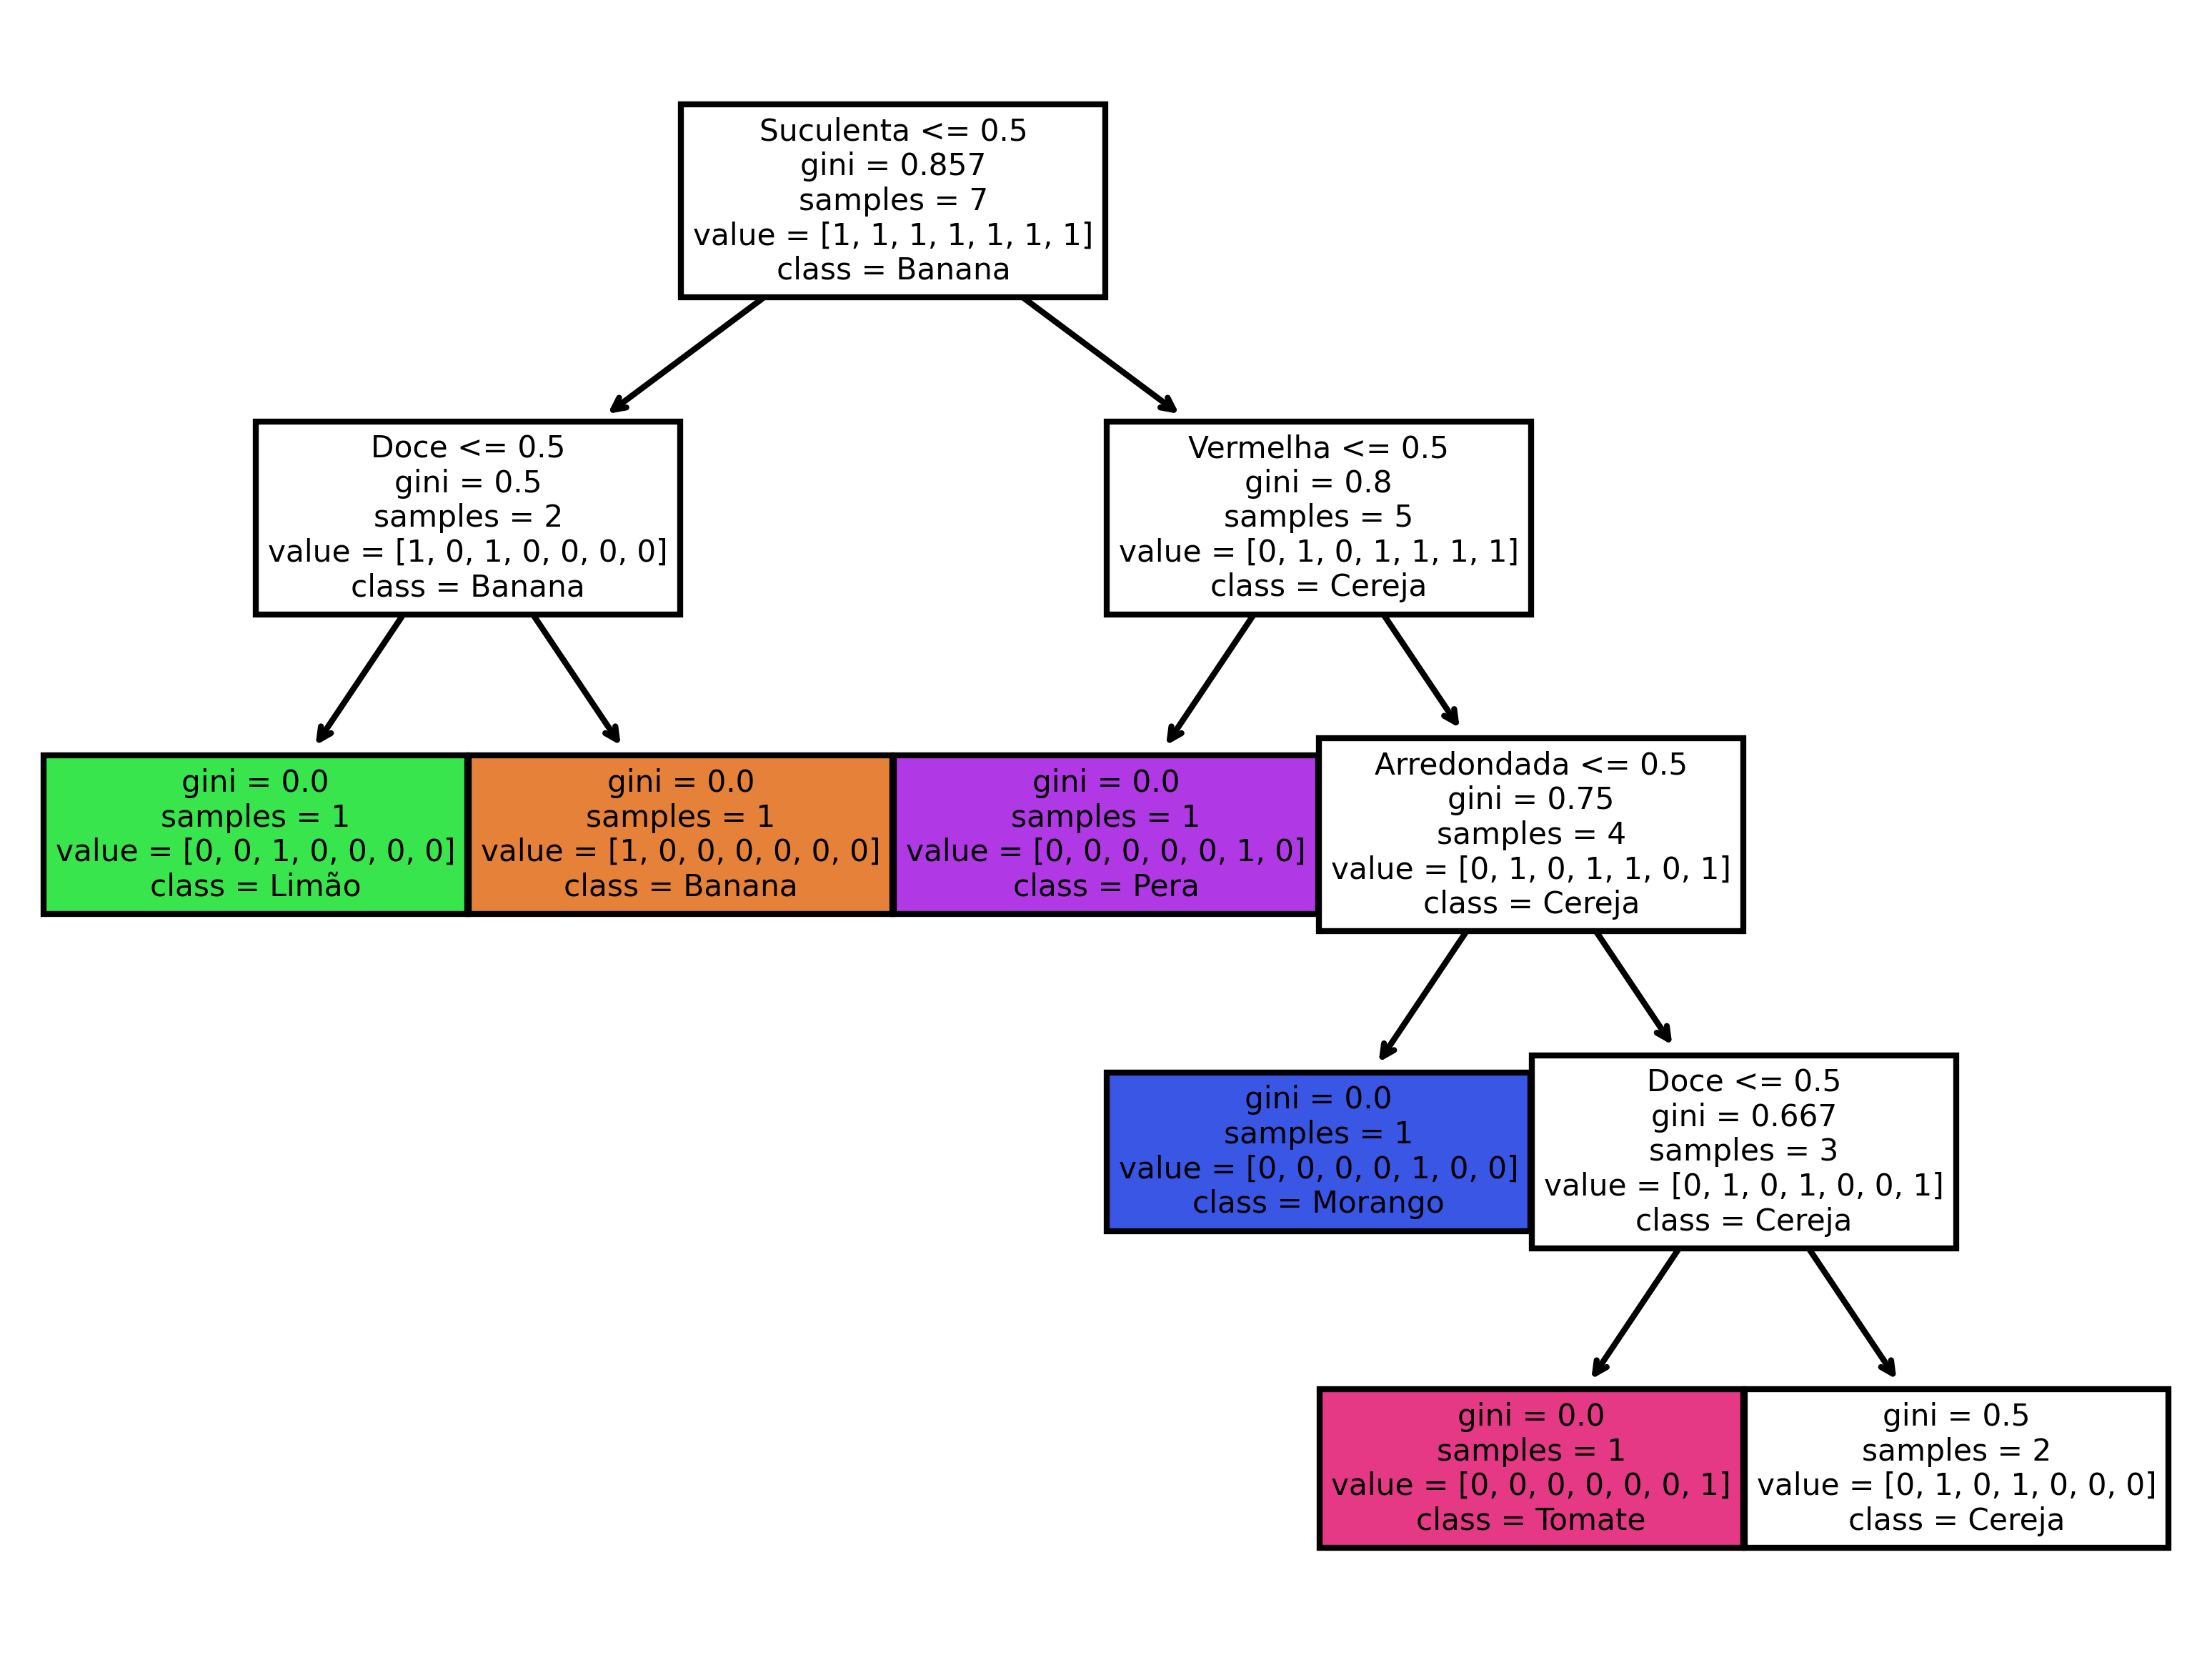

In [15]:
plt.figure(dpi=600)

tree.plot_tree(arvore, class_names=arvore.classes_,
              feature_names=features,
              filled=True);

In [18]:
# ["Arredondada", "Suculenta", "Vermelha", "Doce"]

arvore.predict([[0,1,1,1]])

/home/rzanarinol/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Morango'], dtype=object)

In [19]:
arvore.predict_proba([[0,1,1,1]])

/home/rzanarinol/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0., 1., 0., 0.]])

In [20]:
probas = arvore.predict_proba([[0,1,1,1]])[0]
pd.Series(probas, index=arvore.classes_)

/home/rzanarinol/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Banana     0.0
Cereja     0.0
Limão      0.0
Maçã       0.0
Morango    1.0
Pera       0.0
Tomate     0.0
dtype: float64